Monte Carlo price: 7.8694
Black-Scholes price: 7.9656
Asian Call price: 4.5486


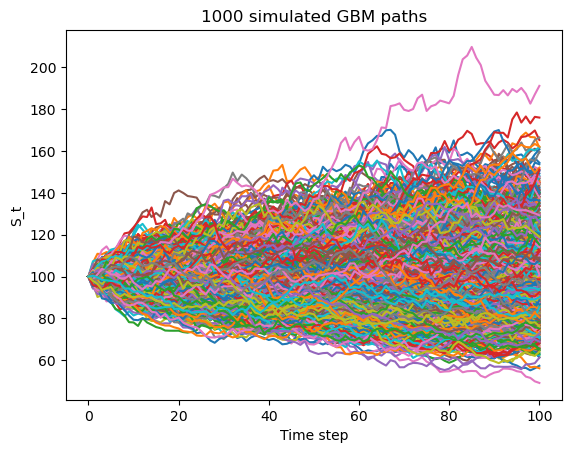

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters (match the PDF)
S0 = 100.0
sigma = 0.2
r = 0.0
T = 1.0
dt = 0.01
N = int(T / dt)
M = 1000
K = 100.0

# Simulate GBM paths
S = np.zeros((M, N + 1), dtype=float)
S[:, 0] = S0

rng = np.random.default_rng()  # modern RNG
for n in range(N):
    Z = rng.standard_normal(M)
    S[:, n + 1] = S[:, n] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
S_T = S[:, -1]

# European call payoff (r = 0 in the PDF)
payoff_call = np.maximum(S_T - K, 0.0)
C_MC = payoff_call.mean()

# Black–Scholes price
d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
C_BS = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Asian call payoff: average over the path excluding t=0 (matches MATLAB mean(S(:,2:end),2))
S_path_avg = S[:, 1:].mean(axis=1)
payoff_asian = np.maximum(S_path_avg - K, 0.0)
C_Asian_MC = payoff_asian.mean()

print(f"Monte Carlo price: {C_MC:.4f}")
print(f"Black-Scholes price: {C_BS:.4f}")
print(f"Asian Call price: {C_Asian_MC:.4f}")

# Plot 1,000 paths
plt.plot(S.T)  # transpose so each path is a line over time
plt.title("1000 simulated GBM paths")
plt.xlabel("Time step")
plt.ylabel("S_t")
plt.show()